In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline

In [2]:
df = pd.read_csv("data/macrodata.csv",index_col=0,parse_dates=True)

In [3]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [17]:
df.index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

In [18]:
df.index.freq = 'Q'

### Using statsmodel to get the trend in the data

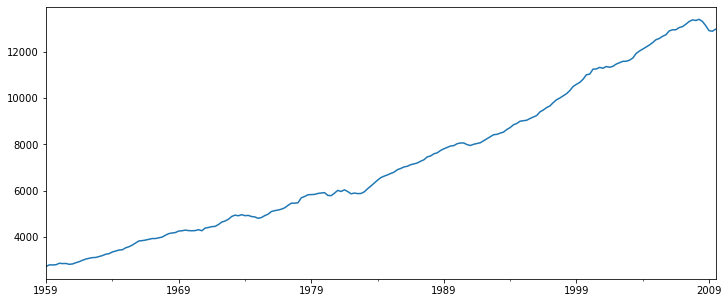

In [5]:
## plotting the data
df['realgdp'].plot(figsize=(12,5));

**Using hodrick-prescott filter to separate time series into trend component and cyclical or random component**

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [7]:
## lamb = 1296000 --> for monthly data
## lamb = 1600 --> for quarterly data
## lamb = 6.25 --> for annual data
gdp_cyclical, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

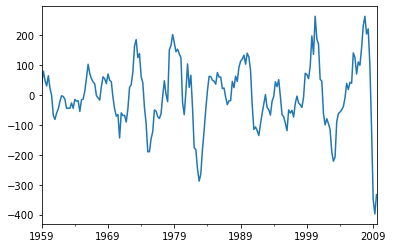

In [11]:
gdp_cyclical.plot();

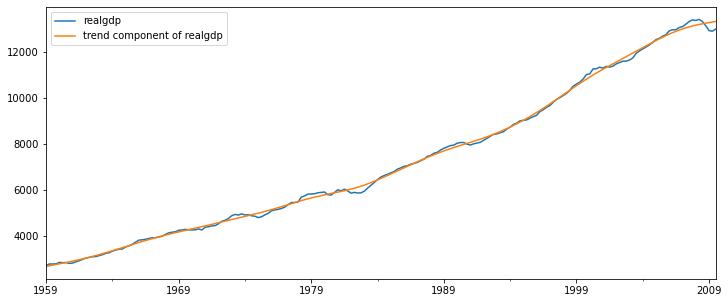

In [15]:
df['realgdp'].plot(legend=True,figsize=(12,5))
gdp_trend.rename('trend component of realgdp').plot(legend=True);

**Using ETS (Error-Trend-Seasonality) decomposition to get the three components of the data**

In [36]:
## getting the new data
df1 = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [37]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [38]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [39]:
df1.index.freq = 'MS'

In [40]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [41]:
## checking for missing values in the data 
df1.isnull().sum()

Thousands of Passengers    0
dtype: int64

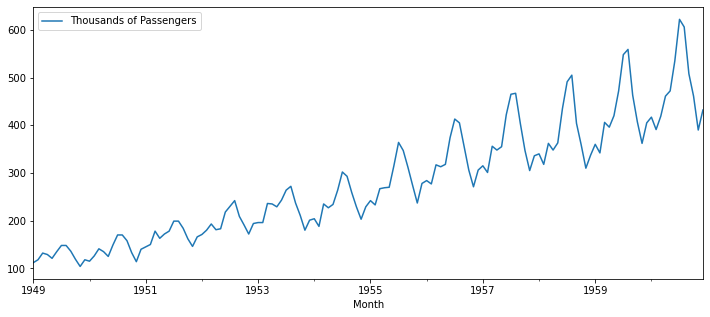

In [42]:
## plotting the data
df1.plot(figsize=(12,5));

**Finding the error, trend and seasonality components of the data using seasonal_decompose**

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
parts = seasonal_decompose(df1['Thousands of Passengers'], model='multiplicative')

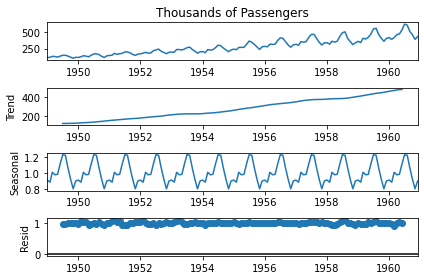

In [45]:
parts.plot();

#### Moving averages

In [46]:
df1['6-month-SMA'] = df1['Thousands of Passengers'].rolling(window=6).mean()
df1['12-month-SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()

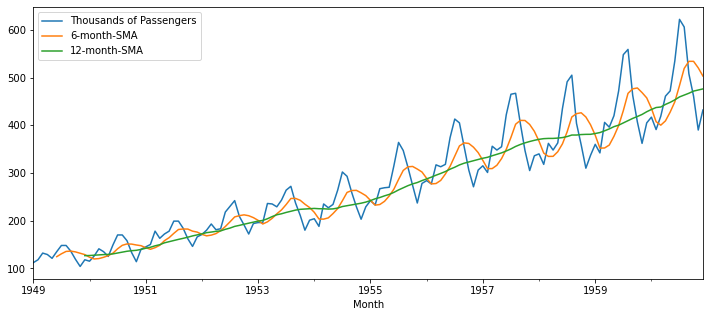

In [47]:
df1.plot(figsize=(12,5));

#### Simple Exponentially weighted moving average (EWMA)

In [48]:
df1['EWMA12'] = df1['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

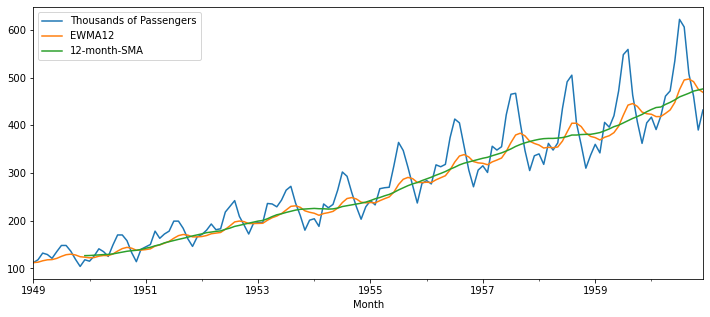

In [49]:
df1[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,5));

**This technique doesn't perform well when the data has some trend or seasonality to it to it. In order to overcome this we use dowble EWMA and triple EWMA**

#### Double Exponentially Weighted Moving Averages aka Holt's method

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothingialSmoothing

In [51]:
df1['DESadd12'] = ExponentialSmoothing(df1['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


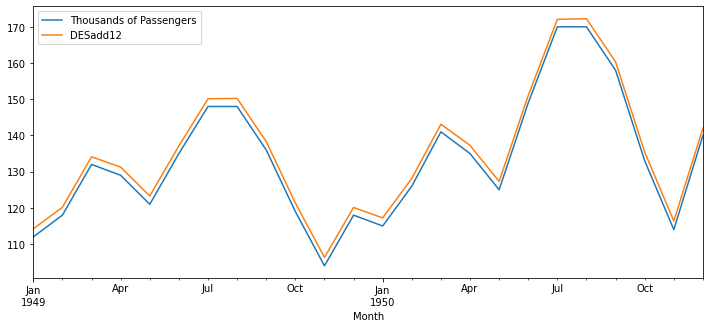

In [54]:
df1[['Thousands of Passengers','DESadd12']].iloc[:24].plot(figsize=(12,5));

In [55]:
df1['DESmul12'] = ExponentialSmoothing(df1['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


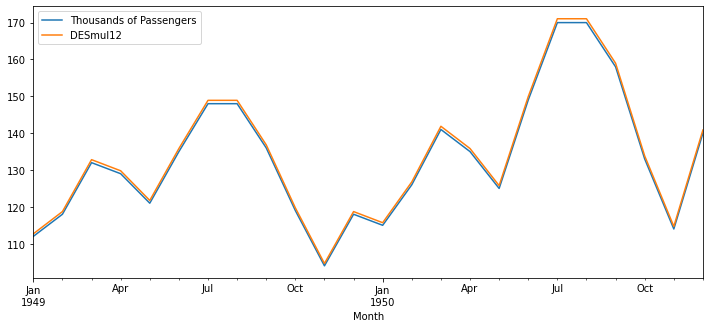

In [56]:
df1[['Thousands of Passengers','DESmul12']].iloc[:24].plot(figsize=(12,5));

#### Triple Exponentially Weighed Moving Average aka holt-winter method

In [60]:
df1['TESadd12'] = ExponentialSmoothing(df1['Thousands of Passengers'],trend='add',
                                      seasonal='add',seasonal_periods=12).fit().fittedvalues

In [61]:
df1['TESmul12'] = ExponentialSmoothing(df1['Thousands of Passengers'],trend='mul',
                                      seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


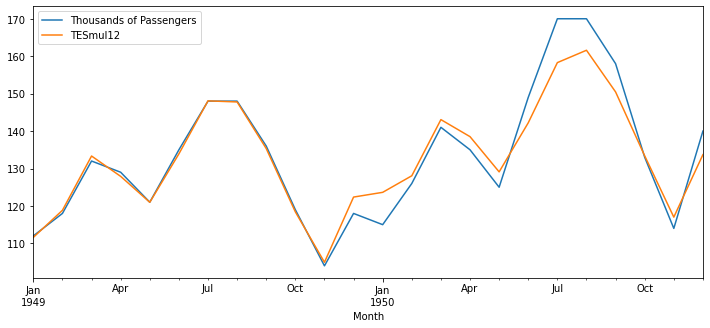

In [62]:
df1[['Thousands of Passengers','TESmul12']].iloc[:24].plot(figsize=(12,5));

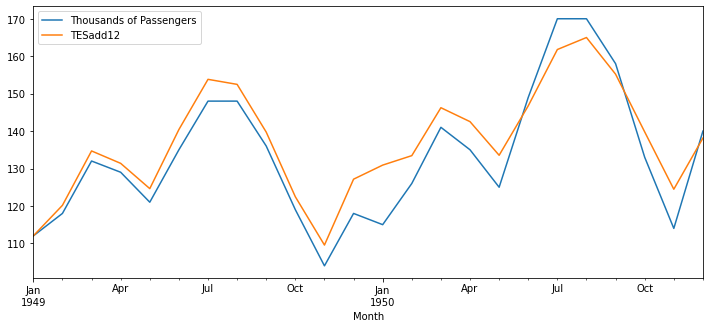

In [63]:
df1[['Thousands of Passengers','TESadd12']].iloc[:24].plot(figsize=(12,5));